# _**Employee Attrition**_ #

1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

2. EDA

C:\Users\victus\AppData\Local\Temp\ipykernel_10388\2606468043.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
C:\Users\victus\AppData\Local\Temp\ipykernel_10388\2606468043.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

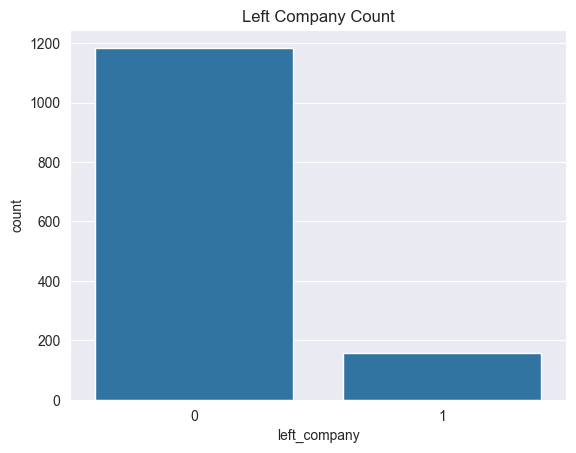

In [15]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop(columns=['ID'], inplace=True)
test_ids = test['ID']
test.drop(columns=['ID'], inplace=True)

label_cols = train.select_dtypes(include=['object']).columns.tolist()
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('left_company')


for col in label_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)
    labelencoder = LabelEncoder()
    train[col] = labelencoder.fit_transform(train[col])
    test[col] = labelencoder.fit_transform(test[col])
    

for col in num_cols:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)
    
    
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(train.drop(columns=['left_company'])), columns=train.columns[:-1])
y = train['left_company']
x_test_final = pd.DataFrame(scaler.transform(test), columns=test.columns)


sns.countplot(x='left_company', data=train)
plt.title("Left Company Count")
plt.show()

3. Baseline Model: Logistic Regression

Logistic Regression(no class weight
F1 score: 0.21621621621621623
Recall: 0.13793103448275862
Precision: 0.5
ruc_auc: 0.8301724137931035


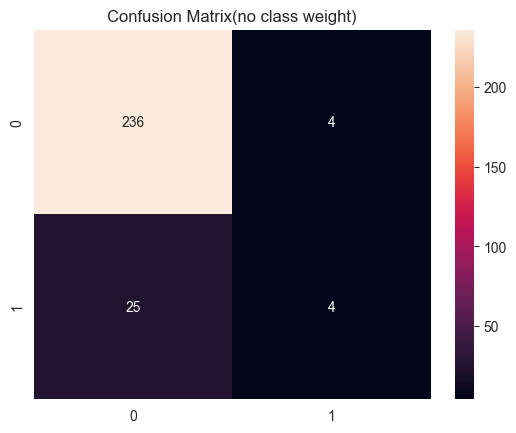

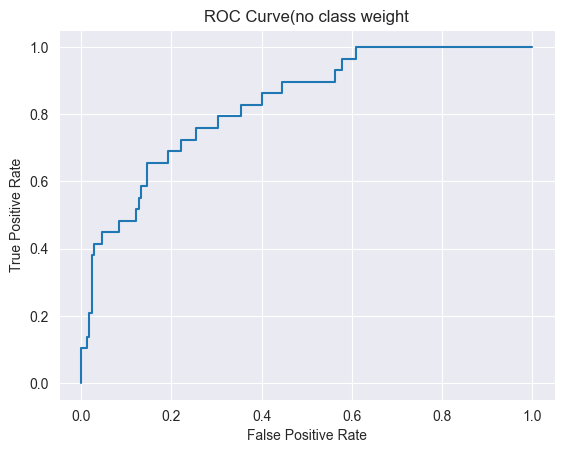

Logistic Regression(balanced)
F1 score: 0.39622641509433965
Recall: 0.7241379310344828
Precision: 0.2727272727272727
ruc_auc: 0.8316091954022988


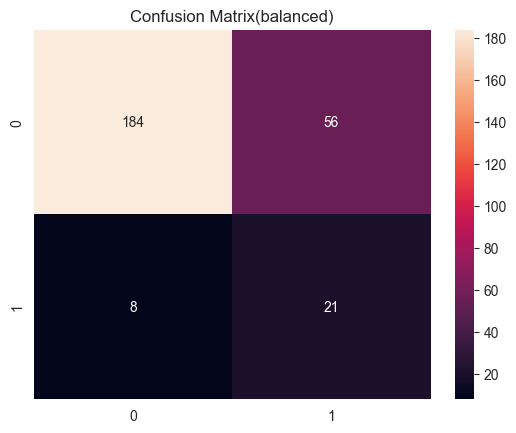

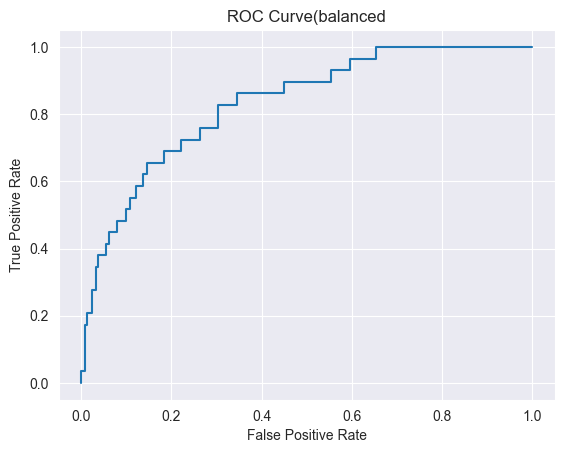

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Logistic Regression(no class weight')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix(no class weight)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(no class weight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


#--------------------------------------------------------------------------------


lr_bal = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_bal.fit(x_train, y_train)
y_pred_bal = lr_bal.predict(x_test)


print('Logistic Regression(balanced)')
print(f'F1 score: {f1_score(y_test, y_pred_bal)}')
print(f'Recall: {recall_score(y_test, y_pred_bal)}')
print(f'Precision: {precision_score(y_test, y_pred_bal)}')
print(f'roc_auc: {roc_auc_score(y_test, lr_bal.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=True, fmt='d')
plt.title('Confusion Matrix(balanced)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lr_bal.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(balanced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4: Advanced Models

4.1: SVM(kernel = linear)

SVM Linear Classifier
F1 score: 0.42201834862385323
Recall: 0.7931034482758621
Precision: 0.2875
ruc_auc score: 0.8362068965517242


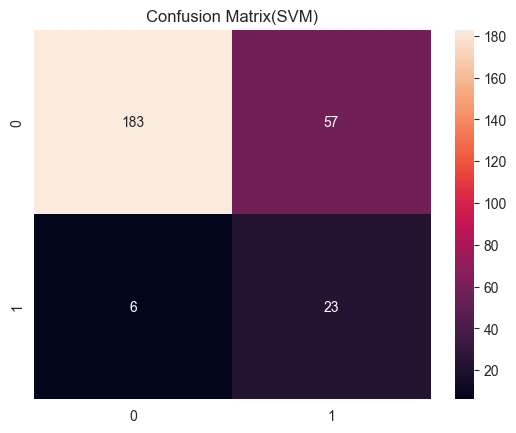

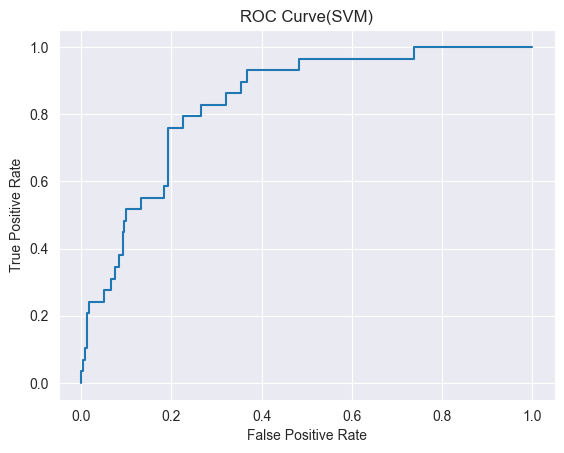

In [17]:
svm_linear = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_linear.fit(x_train, y_train)
y_pred_svm_linear = svm_linear.predict(x_test)

print('SVM Linear Classifier')
print(f'F1 score: {f1_score(y_test, y_pred_svm_linear)}')
print(f'Recall: {recall_score(y_test, y_pred_svm_linear)}')
print(f'Precision: {precision_score(y_test, y_pred_svm_linear)}')
print(f'roc_auc score: {roc_auc_score(y_test, svm_linear.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear), annot=True, fmt='d')
plt.title('Confusion Matrix(SVM)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, svm_linear.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.2: SVM(Kernel : RBF)

SVM RBF Classifier
f1 : 0.45569620253164556
recall: 0.6206896551724138
precision: 0.36
roc_auc: 0.8426724137931034


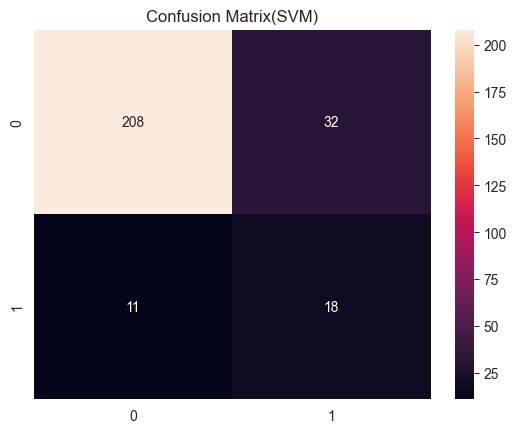

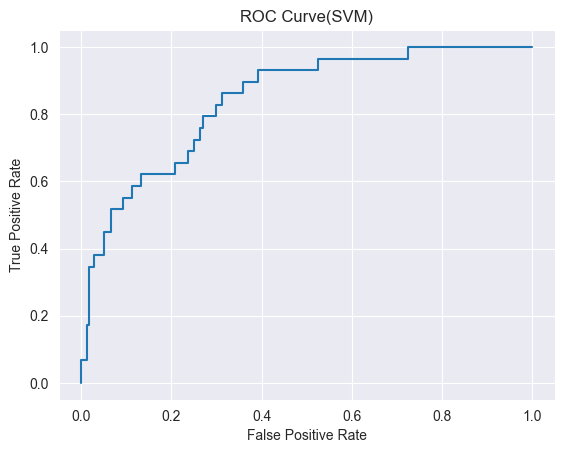

In [18]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_rbf.fit(x_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(x_test)

print('SVM RBF Classifier')
print(f'f1 : {f1_score(y_test, y_pred_svm_rbf)}')
print(f'recall: {recall_score(y_test, y_pred_svm_rbf)}')
print(f'precision: {precision_score(y_test, y_pred_svm_rbf)}')
print(f'roc_auc: {roc_auc_score(y_test, svm_rbf.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True, fmt='d')
plt.title('Confusion Matrix(SVM)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, svm_rbf.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.3: XGBoost

XGBoost Classifier
f1 : 0.4
recall: 0.3103448275862069
precision: 0.5625
roc_auc: 0.8566091954022989


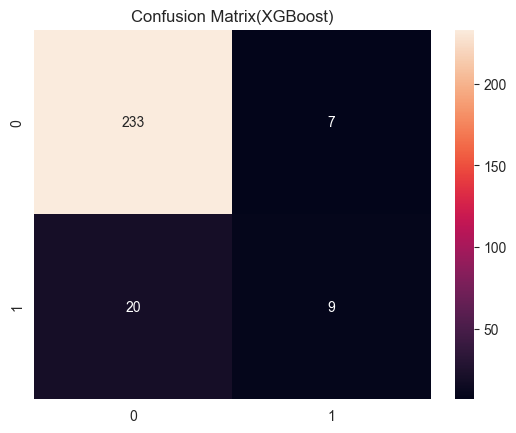

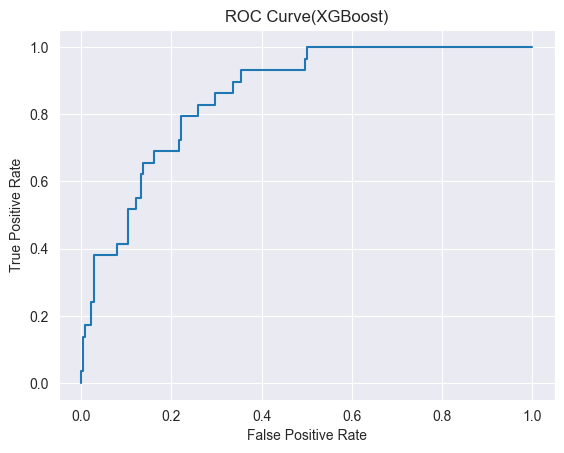

In [26]:
xgb = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), eval_metric='auc')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print('XGBoost Classifier')
print(f'f1 : {f1_score(y_test, y_pred_xgb)}')
print(f'recall: {recall_score(y_test, y_pred_xgb)}')
print(f'precision: {precision_score(y_test, y_pred_xgb)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('Confusion Matrix(XGBoost)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.4: K-Nearest Neighbors

K-Nearest Neighbors
f1: 0.27586206896551724
recall: 0.8275862068965517
precision: 0.16551724137931034
ruc_auc: 0.7775862068965518


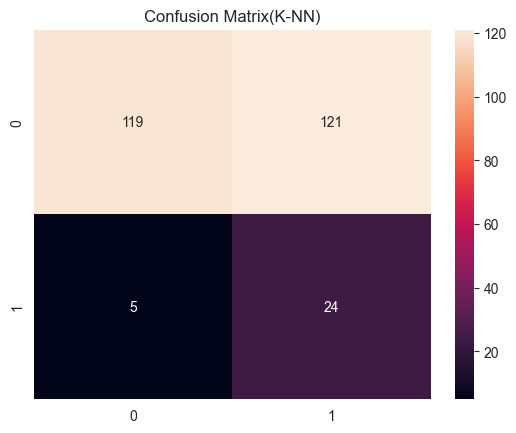

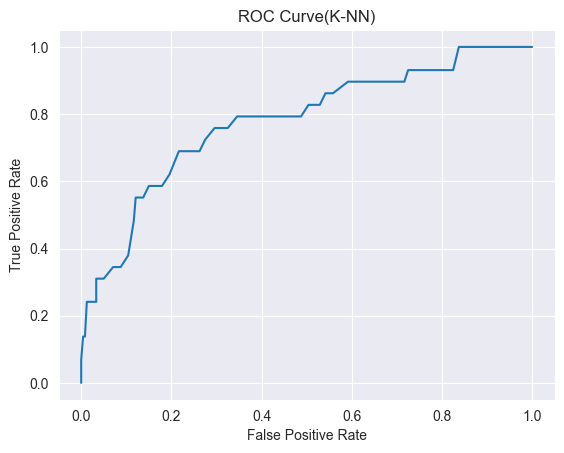

In [23]:
knn = KNeighborsClassifier(n_neighbors=100)
sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)
knn.fit(x_res, y_res)
y_pred_knn = knn.predict(x_test)

print('K-Nearest Neighbors')
print(f'f1: {f1_score(y_test, y_pred_knn)}')
print(f'recall: {recall_score(y_test, y_pred_knn)}')
print(f'precision: {precision_score(y_test, y_pred_knn)}')
print(f'roc_auc: {roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix(K-NN)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(K-NN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

5.1 Handling Imbalanced Data(SMOTE)

XGBoost with SMOTE Classifier
f1: 0.4230769230769231
recall: 0.3793103448275862
precision: 0.4782608695652174
ruc_auc: 0.8512931034482758


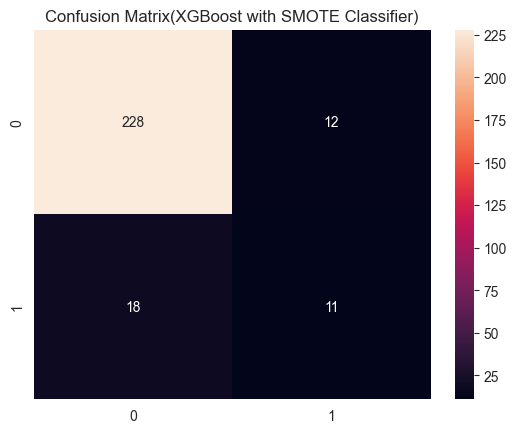

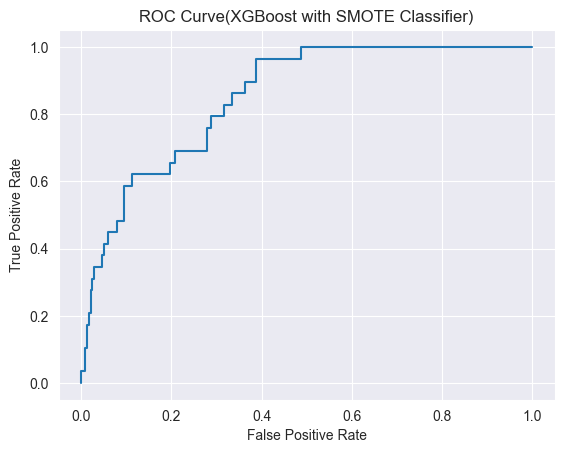

In [50]:
smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(x_train, y_train)

xgb_sm = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
xgb_sm.fit(x_sm, y_sm)
y_pred_xgb_sm = xgb_sm.predict(x_test)

print('XGBoost with SMOTE Classifier')
print(f'f1: {f1_score(y_test, y_pred_xgb_sm)}')
print(f'recall: {recall_score(y_test, y_pred_xgb_sm)}')
print(f'precision: {precision_score(y_test, y_pred_xgb_sm)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb_sm.predict_proba(x_test)[:, 1])}')

sns.heatmap(confusion_matrix(y_test, y_pred_xgb_sm), annot=True, fmt='d')
plt.title('Confusion Matrix(XGBoost with SMOTE Classifier)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb_sm.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(XGBoost with SMOTE Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

5.2 Handling Imbalanced Data

Random Forest Classifier
f1: 0.48333333333333334
recall: 1.0
precision: 0.31868131868131866
roc_auc: 0.979956896551724


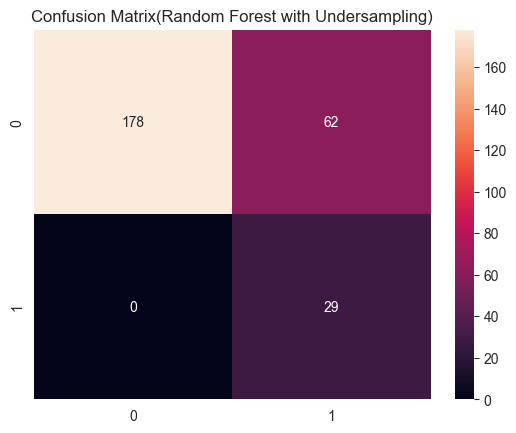

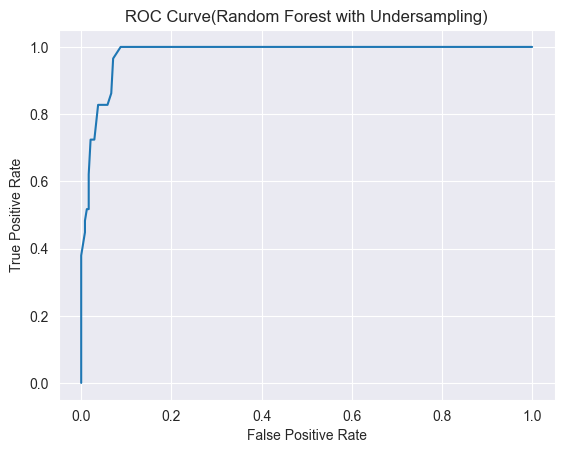

In [56]:
train_majority = train[train.left_company == 0]
train_minority = train[train.left_company == 1]

train_majority_downsampled = train_majority.sample(n=len(train_minority), random_state=42)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])


x_down = pd.DataFrame(scaler.fit_transform(train_downsampled.drop(columns='left_company')), columns=x.columns)
y_down = train_downsampled['left_company']


rf_under = RandomForestClassifier(random_state=42)
rf_under.fit(x_down, y_down)
y_pred_rf_under = rf_under.predict(x_test)

print('Random Forest Classifier')
print(f'f1: {f1_score(y_test, y_pred_rf_under)}')
print(f'recall: {recall_score(y_test, y_pred_rf_under)}')
print(f'precision: {precision_score(y_test, y_pred_rf_under)}')
print(f'roc_auc: {roc_auc_score(y_test, rf_under.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_rf_under), annot=True, fmt='d')
plt.title('Confusion Matrix(Random Forest with Undersampling)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, rf_under.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(Random Forest with Undersampling)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

6. Stacking Ensemble

In [58]:
stack = StackingClassifier(
    estimators=[
        ('rf', rf_under),
        ('xgb', xgb_sm)
    ],
    final_estimator = LogisticRegression(random_state=42)
)

stack.fit(x_train, y_train)
y_pred_stack = stack.predict(x_test)

print('Stacking Classifier')
print(f'f1: {f1_score(y_test, y_pred_stack)}')
print(f'recall: {recall_score(y_test, y_pred_stack)}')
print(f'precision: {precision_score(y_test, y_pred_stack)}')
print(f'roc_auc: {roc_auc_score(y_test, stack.predict_proba(x_test)[:, 1])}')

Stacking Classifier
f1: 0.2222222222222222
recall: 0.13793103448275862
precision: 0.5714285714285714
roc_auc: 0.8852011494252874
